# Assignment Objective
Build a model to predict the house prices

# Import Libraries

In [44]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [45]:
# Import dataset as a pandas DataFrame
df = pd.read_excel('./dataset1.xlsx')

# Exploratory Data Analysis

## View 5 random samples

In [46]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12037,-117.59,34.10,17,3646,1035.0,1987,895,2.3603,139300,INLAND
8944,-122.31,38.30,45,3023,659.0,1789,657,3.6039,126000,NEAR BAY
7208,-118.10,33.85,36,1473,253.0,713,257,5.9493,228000,<1H OCEAN
6951,-118.11,33.93,17,1205,347.0,736,342,3.2011,162500,<1H OCEAN
10963,-117.29,33.83,15,4173,804.0,2393,713,2.4662,118300,INLAND


## View the number of rows and columns in the dataset

In [47]:
df.shape

(18565, 10)

## View number of missing values in each column

In [48]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        189
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Drop rows that have missing values for total_bedrooms

In [49]:
# total_bedrooms has 189 missing values
# remove null values, as they are ,1% of datapoints
df = df.dropna()

In [50]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## View the distribution of features and target variable

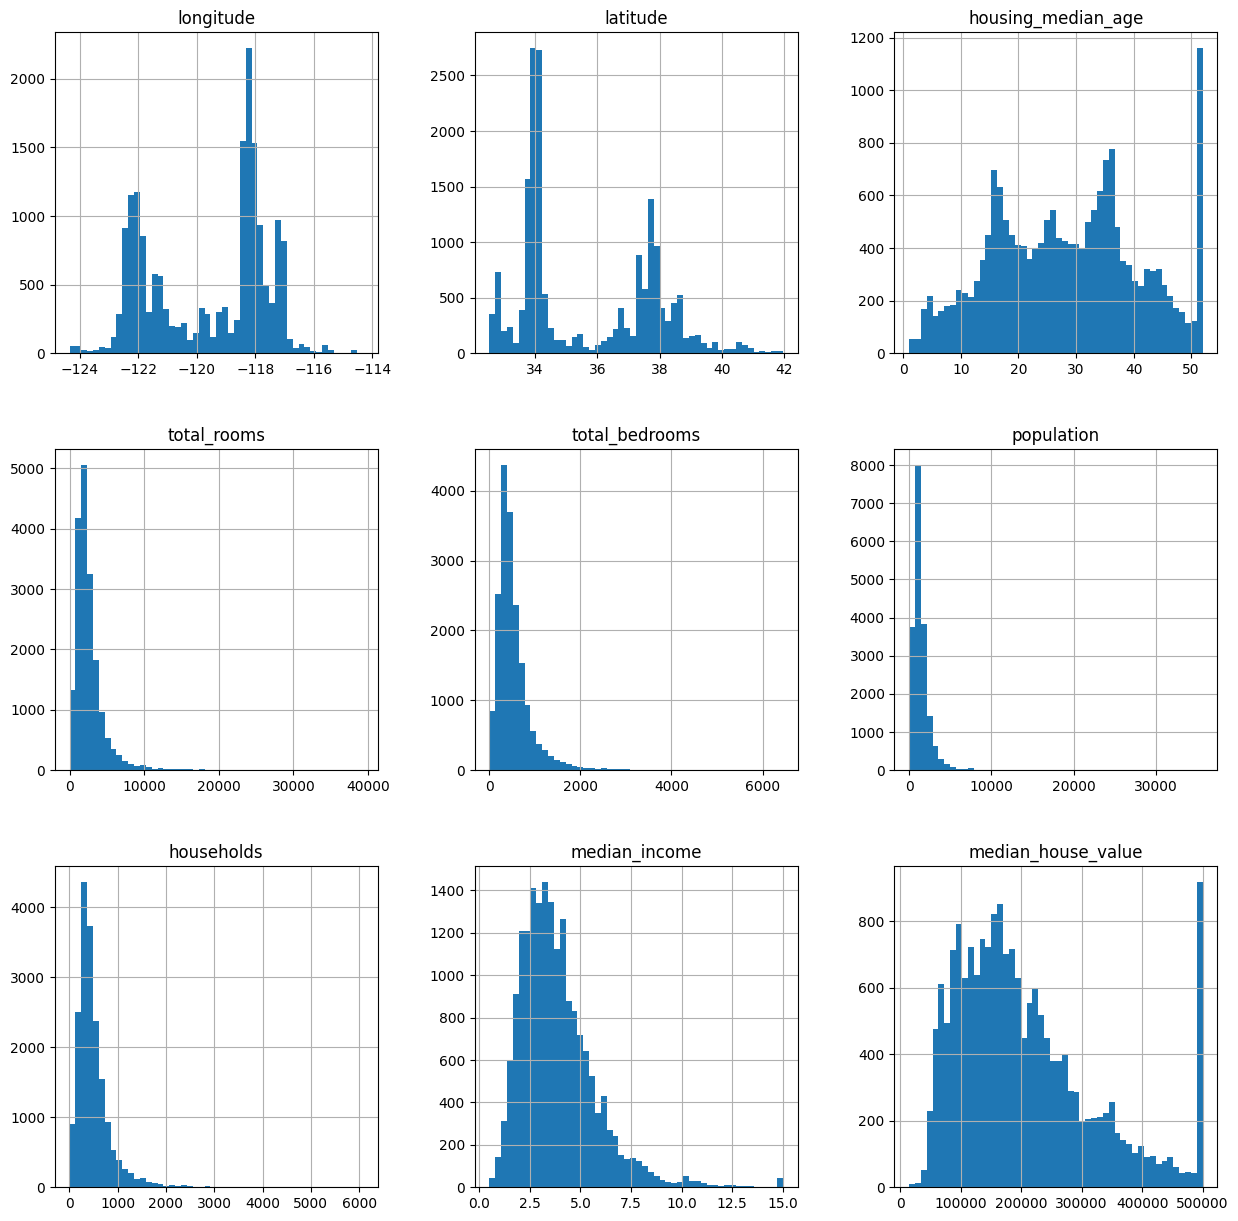

In [51]:
# View distribution of  variables
df.hist(bins=50, figsize=(15, 15))
plt.show()

## Target variable has outliers

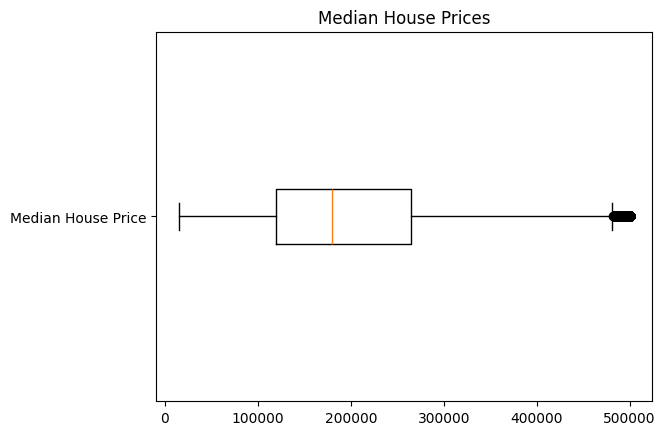

In [9]:
plt.boxplot(df['median_house_value'], tick_labels=['Median House Price'],vert=False) 
plt.title('Median House Prices') 
plt.show()

## Remove outliers in target variable

In [11]:
# Remove outliers
min_value = df['median_house_value'].min()
q1,q3 = np.percentile(df['median_house_value'],[25,75])
median = df['median_house_value'].median()
max_value = df['median_house_value'].max()
min_value,q1,q3,median,max_value

(14999, 119200.0, 264325.0, 179400.0, 500001)

In [12]:
iqr = q3-q1
lower_boundary = q1 - 1.5*iqr
upper_boundary = q3 + 1.5*iqr
range = [lower_boundary,upper_boundary]
range

[-98487.5, 482012.5]

In [14]:
# outliers
outlier = df[(df['median_house_value'] < lower_boundary) | (df['median_house_value']> upper_boundary)]
outlier

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
82,-122.27,37.80,52,249,78.0,396,85,1.2434,500001,NEAR BAY
414,-122.25,37.87,52,609,236.0,1349,250,1.1696,500001,NEAR BAY
444,-122.25,37.86,48,2153,517.0,1656,459,3.0417,489600,NEAR BAY
448,-122.24,37.86,52,1668,225.0,517,214,7.8521,500001,NEAR BAY
449,-122.24,37.85,52,3726,474.0,1366,496,9.3959,500001,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
18366,-118.90,34.14,35,1503,263.0,576,216,5.1457,500001,<1H OCEAN
18370,-118.69,34.18,11,1177,138.0,415,119,10.0472,500001,<1H OCEAN
18371,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,500001,<1H OCEAN
18380,-118.69,34.21,10,3663,409.0,1179,371,12.5420,500001,<1H OCEAN


In [15]:
df = df[(df['median_house_value'] > lower_boundary) & (df['median_house_value'] < upper_boundary)]

In [17]:
df.shape

(17419, 10)

## View the datatype of each column

In [52]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

## One-Hot Encoding for categorical variable

In [53]:
# One-Hot Encoding for ocean_proximity
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [54]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
ohe_transform = encoder.fit_transform(df[['ocean_proximity']])
df = pd.concat([df,ohe_transform], axis=1).drop(columns=['ocean_proximity'])

In [55]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1436,-121.99,37.83,16,2939,380.0,1177,396,8.0839,372000,1.0,0.0,0.0,0.0,0.0


## Setup validation framework: Split data into training & test sets

In [75]:
# Split data into train, test, split
y = df['median_house_value']

In [76]:
X = df.drop('median_house_value',axis=1)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [78]:
X_train.shape

(14700, 13)

In [79]:
X_test.shape

(3676, 13)

In [80]:
y_train.shape

(14700,)

In [81]:
y_test.shape

(3676,)

## Feature Scaling

In [82]:
# Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train Linear Regression Model

In [83]:
# Train the Linear Regression Model
# Import LinearRegression.
from sklearn.linear_model import LinearRegression


# Instantiate linear regression model.
model = LinearRegression()

In [84]:
# Fit the model to the training data.
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
# Make predictions on the testing data.
y_pred = model.predict(X_test_scaled)

# Evaluate Model Performance

In [86]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score


# Calculate and print R^2 score.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.6523


In [87]:
# Calculate and print MSE.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

Mean squared error: 4589575748.9471
Root mean squared error: 67746.4076


In [88]:
print("Intercept:", model.intercept_)


coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

Intercept: 206568.69340136054

Feature Coefficients:
                        Feature   Coefficient
0                    longitude -54825.711370
1                     latitude -55945.295579
2           housing_median_age  13498.354493
3                  total_rooms -12227.233390
4               total_bedrooms  43518.255711
5                   population -41177.981462
6                   households  14569.331144
7                median_income  74631.417903
8    ocean_proximity_<1H OCEAN   5898.662595
9       ocean_proximity_INLAND -12139.901192
10      ocean_proximity_ISLAND   3024.750758
11    ocean_proximity_NEAR BAY   2560.410653
12  ocean_proximity_NEAR OCEAN   5623.969608


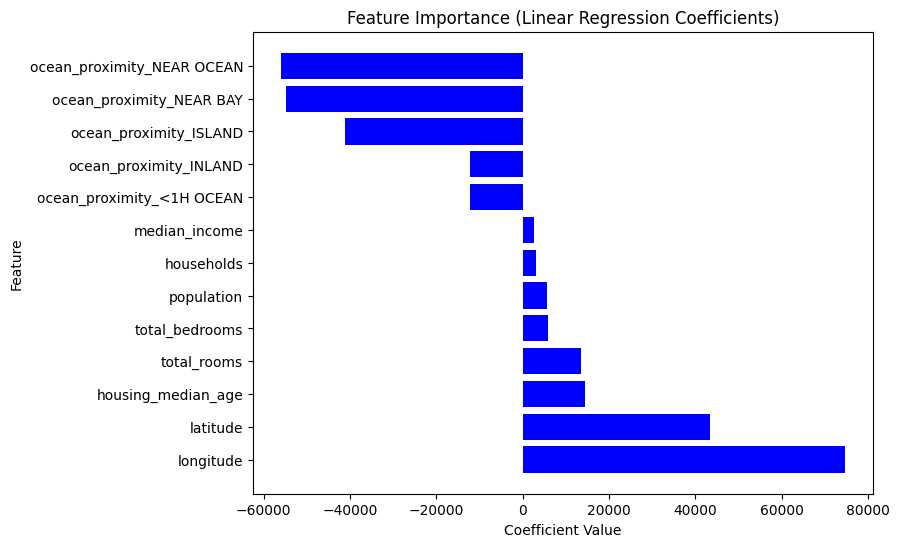

In [89]:
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)


# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

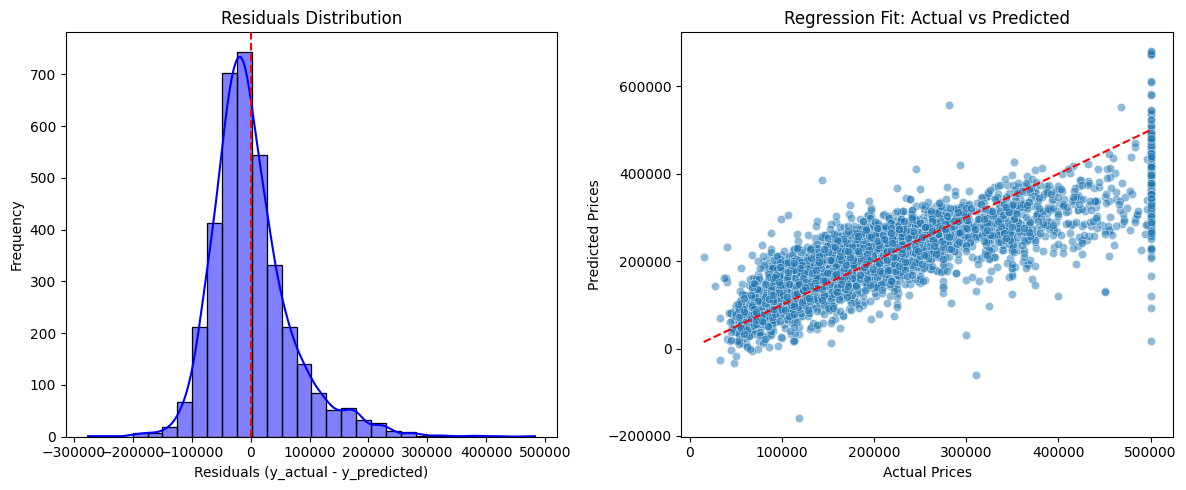

In [90]:
# Compute residuals.
residuals = y_test - y_pred


# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")


# Show plots.
plt.tight_layout()
plt.show()

In [91]:
y_pred

array([433865.32057645, 284346.37567095, 202109.44002763, ...,
       317093.30342144, 233162.91865123, 198410.18198766])